## TASK SOLUTION: 24th July 2022

We have Attribute Dataset and Dress Sales Dataset. These are connected to each other based on Dress_ID. Perform the Following Task:

### 1. Create a Table of attribute dataset and dress dataset in mysql workbench/python

In [54]:
import xlrd
import mysql.connector as sql

In [55]:
connection = sql.connect(host="localhost",user="root",password="admin")
print(connection)

In [56]:
cursor=connection.cursor()

In [7]:
q='create database ineurontask'
cursor.execute(q)

In [57]:
q='use ineurontask'
cursor.execute(q)

In [9]:
#Create table attribute_dataset
q1="""create table if not exists attribute_dataset (
dress_id int ,
style varchar(30) , 
price varchar(30) , 
rating decimal (2,1) ,
size varchar(30),
season varchar(30),
neckline varchar(30),
sleevelength varchar(30) , 
waiseline varchar(30) ,
material varchar(30) , 
fabrictype varchar(30) , 
decoration varchar(30) , 
patterntype varchar(30) , 
recommendation int
)"""
cursor.execute(q1)

In [10]:
#Creating table for Dress Sales
query1="""create table if not exists dress_sales (
dress_id int ,
`29/8/2013` int , 
`31/8/2013` int , 
`2/9/2013` int ,
`4/9/2013` int ,
`6/9/2013` int,
`8/9/2013` int,
`10/9/2013` int , 
`12/9/2013` int ,
`14/9/2013` int , 
`16/9/2013` int , 
`18/9/2013` int , 
`20/9/2013` int , 
`22/9/2013` int ,
`24/9/2013` int ,
`26/9/2013` int ,
`28/9/2013` int ,
`30/9/2013` int ,
`2/10/2013` int ,
`4/10/2013` int ,
`6/10/2013` int ,
`8/10/2013` int ,
`10/10/2013` int ,
`12/10/2013` int
)"""
cursor.execute(query1)

In [11]:
q='show tables'
cursor.execute(q)

In [12]:
print(cursor.fetchall())

[('attribute_dataset',), ('dress_sales',)]


### 2. Do a bulk load for these 2 tables for respective dataset in mysql workbench/python

In [14]:
#bulk upload data from excel using xlrd module

# Open the workbook and define the worksheet
book = xlrd.open_workbook("Attribute DataSet.xls")
sheet = book.sheet_by_index(0)


In [15]:
query = """INSERT INTO attribute_dataset (dress_id, style, price, rating, size, season, neckline, sleevelength, waiseline, material, fabrictype, decoration, patterntype, recommendation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""

In [16]:
for r in range(1, sheet.nrows):
    dress_id= sheet.cell(r,0).value
    style= sheet.cell(r,1).value
    price= sheet.cell(r,2).value
    rating= sheet.cell(r,3).value
    size= sheet.cell(r,4).value
    season= sheet.cell(r,5).value
    neckline= sheet.cell(r,6).value
    sleevelength= sheet.cell(r,7).value
    waiseline= sheet.cell(r,8).value
    material= sheet.cell(r,9).value
    fabrictype= sheet.cell(r,10).value
    decoration= sheet.cell(r,11).value
    patterntype= sheet.cell(r,12).value
    recommendation= sheet.cell(r,13).value
    values = (dress_id, style, price, rating, size, season, neckline, sleevelength, waiseline, material, fabrictype,decoration, patterntype, recommendation)

    cursor.execute(query, values)

connection.commit()

In [17]:
q="select * from attribute_dataset"
cursor.execute(q)
for i in cursor.fetchall():
    print(i)

(1006032852, 'Sexy', 'Low', Decimal('4.6'), 'M', 'Summer', 'o-neck', 'sleevless', 'empire', 'null', 'chiffon', 'ruffles', 'animal', 1)
(1212192089, 'Casual', 'Low', Decimal('0.0'), 'L', 'Summer', 'o-neck', 'Petal', 'natural', 'microfiber', 'null', 'ruffles', 'animal', 0)
(1190380701, 'vintage', 'High', Decimal('0.0'), 'L', 'Automn', 'o-neck', 'full', 'natural', 'polyster', 'null', 'null', 'print', 0)
(966005983, 'Brief', 'Average', Decimal('4.6'), 'L', 'Spring', 'o-neck', 'full', 'natural', 'silk', 'chiffon', 'embroidary', 'print', 1)
(876339541, 'cute', 'Low', Decimal('4.5'), 'M', 'Summer', 'o-neck', 'butterfly', 'natural', 'chiffonfabric', 'chiffon', 'bow', 'dot', 0)
(1068332458, 'bohemian', 'Low', Decimal('0.0'), 'M', 'Summer', 'v-neck', 'sleevless', 'empire', 'null', 'null', 'null', 'print', 0)
(1220707172, 'Casual', 'Average', Decimal('0.0'), 'XL', 'Summer', 'o-neck', 'full', 'null', 'cotton', 'null', 'null', 'solid', 0)
(1219677488, 'Novelty', 'Average', Decimal('0.0'), 'free', '

In [19]:
#bulk upload data from python using mysql commandline

q3="""LOAD DATA INFILE 'dress_sales.csv' INTO TABLE dress_sales
FIELDS TERMINATED BY ','
ENCLOSED BY '"'
LINES TERMINATED BY '\r\n'
IGNORE 1 LINES;"""
cursor.execute(q3)
connection.commit()

In [20]:
q="select * from dress_sales"
cursor.execute(q)
for i in cursor.fetchall():
    print(i)

(1006032852, 2114, 2274, 2491, 2660, 2727, 2887, 2930, 3119, 3204, 3277, 3321, 3386, 3479, 3554, 3624, 3706, 3746, 3795, 3832, 3897, 3923, 3985, 4048)
(1212192089, 151, 275, 570, 750, 813, 1066, 1164, 1558, 1756, 1878, 1985, 2106, 2454, 2710, 2942, 3258, 3354, 3475, 3654, 3911, 4024, 4125, 4277)
(1190380701, 6, 7, 7, 7, 8, 8, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11)
(966005983, 1005, 1128, 1326, 1455, 1507, 1621, 1637, 1723, 1746, 1783, 1796, 1812, 1845, 1878, 1892, 1914, 1924, 1929, 1941, 1952, 1955, 1959, 1963)
(876339541, 996, 1175, 1304, 1396, 1432, 1559, 1570, 1638, 1655, 1681, 1743, 1824, 1919, 2032, 2156, 2252, 2312, 2387, 2459, 2544, 2614, 2693, 2736)
(1068332458, 4, 5, 11, 13, 13, 13, 16, 18, 19, 20, 20, 21, 22, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27)
(1220707172, 45, 61, 131, 165, 176, 209, 216, 251, 262, 289, 295, 325, 353, 379, 400, 417, 424, 445, 462, 474, 494, 503, 552)
(1219677488, 4, 13, 55, 73, 76, 89, 94, 117, 121, 125, 135, 142, 150, 160, 16

### 3. Read these datasets in pandas as a dataframe

In [22]:
import pandas as pd

In [75]:
df_att = pd.read_sql('select * from attribute_dataset', connection)
df_dress = pd.read_sql('select * from dress_sales', connection)

C:\Users\tester\anaconda3_new\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\tester\anaconda3_new\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [25]:
df_att

,dress_id,style,price,rating,size,season,neckline,sleevelength,waiseline,material,fabrictype,decoration,patterntype,recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,null,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,null,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,null,null,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,null,null,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,null,null,null,0
497,532874347,Casual,Average,4.7,M,Summer,v-neck,full,empire,cotton,null,lace,solid,1
498,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,empire,silk,broadcloth,applique,print,1


In [76]:
df_dress

,dress_id,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,...,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2013,10/10/2013,12/10/2013
0,1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624,3706,3746,3795,3832,3897,3923,3985,4048
1,1212192089,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942,3258,3354,3475,3654,3911,4024,4125,4277
2,1190380701,6,7,7,7,8,8,9,10,10,...,11,11,11,11,11,11,11,11,11,11
3,966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892,1914,1924,1929,1941,1952,1955,1959,1963
4,876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156,2252,2312,2387,2459,2544,2614,2693,2736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,713391965,0,0,0,560,554,544,537,525,519,...,400,388,360,364,372,377,380,382,384,285
496,722565148,0,0,0,875,866,861,854,850,844,...,859,866,882,888,895,898,906,913,919,931
497,532874347,0,0,0,734,728,726,715,694,690,...,616,597,586,569,561,555,551,546,535,520
498,655464934,0,0,0,254,259,261,263,268,270,...,257,256,255,254,253,250,249,249,249,248


### 4. Convert Attribute Dataset in JSON Format (.to_json will be used)

In [27]:
df_att.to_json('attri.json')

In [32]:
ls att*

 Volume in drive C is SS
 Volume Serial Number is A86B-0E6E

 Directory of C:\Users\tester\Documents\iNeuron

07/28/2022  09:19 AM            96,050 attri.json
07/25/2022  06:57 AM           133,120 Attribute DataSet.xls
07/24/2022  10:03 AM            47,298 Attribute DataSet.xlsx
               3 File(s)        276,468 bytes
               0 Dir(s)   1,739,948,032 bytes free


### 5. Store this json dataset into mongodb (Insert_many will be used)

In [37]:
import pymongo
import json

client = pymongo.MongoClient("mongodb+srv://jojis:<*****>@cluster0.wj6gl.mongodb.net/?retryWrites=true&w=majority")
mydb = client['ineuron']
mycol = mydb['task']

# Loading the json file
with open(r'C:\Users\tester\Documents\iNeuron\attri.json') as file:
    file_data = json.load(file)

# Inserting the loaded data in the Collection
if isinstance(file_data, list):
    mycol.insert_many(file_data)
else:
    mycol.insert_one(file_data)

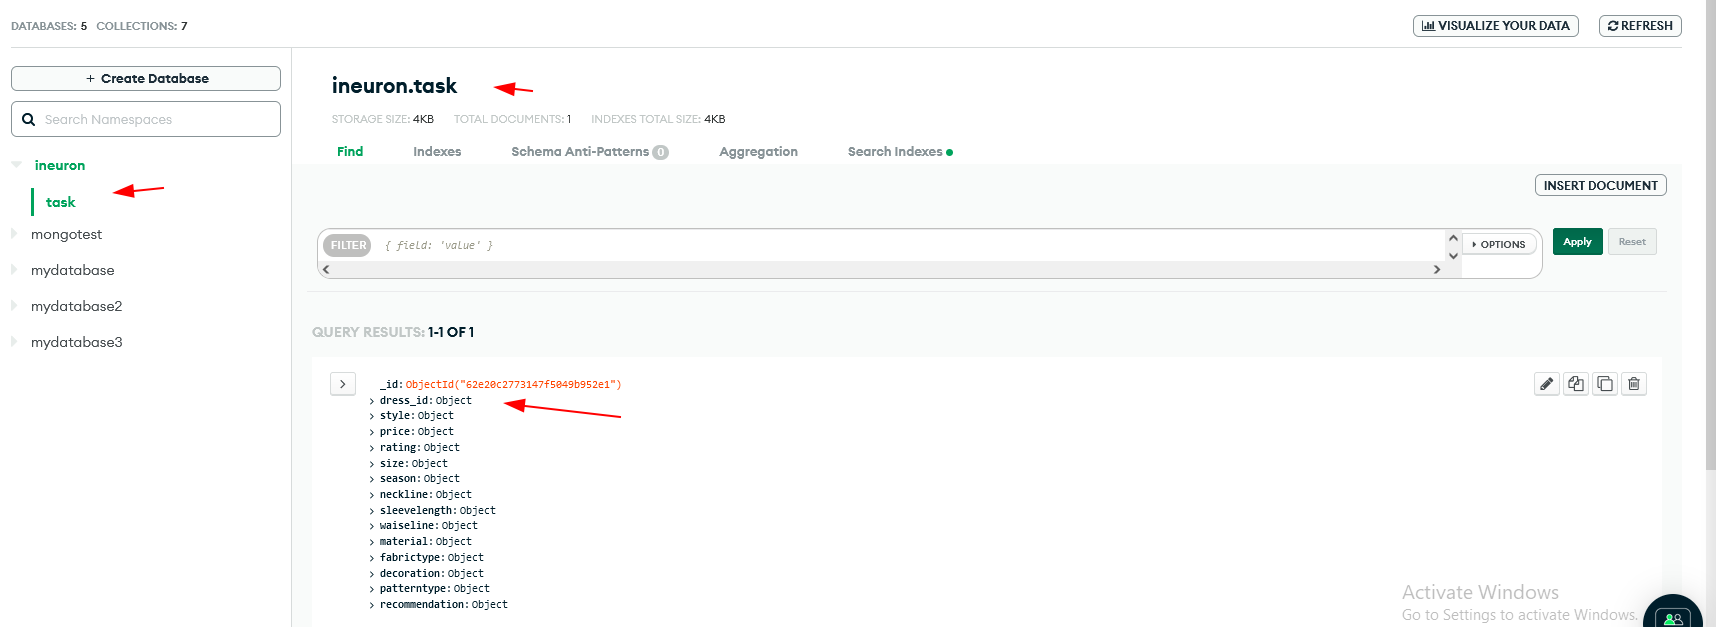

### 6. In SQL task, try to perform left join operation with Attribute dataset and dress dataset on column Dress_ID

In [41]:
query='select * from attribute_dataset att  left join dress_sales dr on att.dress_id=dr.dress_id'
cursor.execute(query)

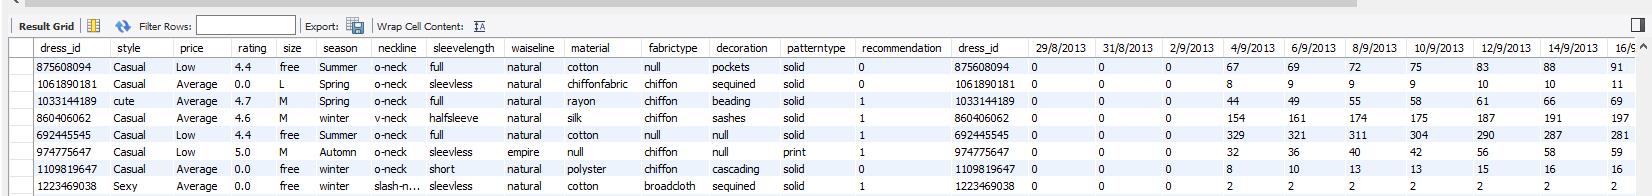

### 7.Write the SQL query to find out how many unique dress that we have based on Dress_ID

In [64]:
query3='select count(distinct(dress_id)) from attribute_dataset'
cursor.execute(query3)


In [65]:
for i in cursor.fetchone():
    print(i)

475


### 8. Try to find out how many dress is having recommendation as 0

In [61]:
query4="select count(dress_id) from attribute_dataset where recommendation='0'"
cursor.execute(query4)

In [62]:
for i in cursor.fetchone():
    print(i)

290


### 9. Try to find out total dress sales for each and every Dress_ID

In [77]:
df_dress['total_sales']=df_dress.values[:,1:].sum(axis =1)

In [78]:
df_dress

,dress_id,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,...,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2013,10/10/2013,12/10/2013,total_sales
0,1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3624,3706,3746,3795,3832,3897,3923,3985,4048,75979
1,1212192089,151,275,570,750,813,1066,1164,1558,1756,...,2942,3258,3354,3475,3654,3911,4024,4125,4277,52256
2,1190380701,6,7,7,7,8,8,9,10,10,...,11,11,11,11,11,11,11,11,11,223
3,966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1892,1914,1924,1929,1941,1952,1955,1959,1963,39691
4,876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2156,2252,2312,2387,2459,2544,2614,2693,2736,44077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,713391965,0,0,0,560,554,544,537,525,519,...,388,360,364,372,377,380,382,384,285,8915
496,722565148,0,0,0,875,866,861,854,850,844,...,866,882,888,895,898,906,913,919,931,17508
497,532874347,0,0,0,734,728,726,715,694,690,...,597,586,569,561,555,551,546,535,520,12606
498,655464934,0,0,0,254,259,261,263,268,270,...,256,255,254,253,250,249,249,249,248,5167


### 10. Try to find out the third highest most selling Dress_ID

In [87]:
df_dress[df_dress.total_sales==df_dress.total_sales.nlargest(3).max()]

,dress_id,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,...,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2013,10/10/2013,12/10/2013,total_sales
29,629131530,7455,7467,7479,7374,7351,7255,7240,7156,7124,...,6528,6476,6327,6285,6142,6049,5912,5862,5753,155927
